In [32]:
import os
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# List of HTML files in the specified directory
html_files = [
    r'C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Project-RP18\physics_datasets\data_archive_stsci_edu.html',
    r'C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Project-RP18\physics_datasets\data_cxc_harvard_edu.html',
    r'C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Project-RP18\physics_datasets\data_einstein_phys_uwm_edu.html'
]

In [10]:
def extract_urls_from_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')
        urls = [link.get('href') for link in soup.find_all('a', href=True)]
    return urls

In [11]:
for html_file in html_files:
    try:
        urls = extract_urls_from_html(html_file)
        print(f"URLs extracted from {html_file}:")
        for url in urls:
            print(url)
    except FileNotFoundError:
        print(f"File not found: {html_file}")
    except Exception as e:
        print(f"Error processing {html_file}: {e}")

URLs extracted from C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Project-RP18\physics_datasets\data_archive_stsci_edu.html:
#top-of-page
/home
/search-results/advanced-search-syntax
https://policies.google.com/privacy
https://policies.google.com/terms
/home
/hlsp
/hlsp/hlsp-table
/hlsp/3d-dash
/hlsp/agnsedatlas
/hlsp/aspic
/hlsp/atlas-refcat2
/hlsp/atlas-var
/hlsp/bluetides
/hlsp/boocats
/hlsp/bosz
/hlsp/buffalo
/hlsp/candels
/hlsp/candels/goods-n-catalogs
/hlsp/candels/goods-s-catalogs
/hlsp/candels/uds-catalogs
/hlsp/candels/egs-catalogs
/hlsp/candels/cosmos-catalogs
/hlsp/candels/goods-n-images
/hlsp/candels/goods-s-images
/hlsp/candels/uds-images
/hlsp/candels/egs-images
/hlsp/candels/cosmos-images
/hlsp/candelsnirwl
/hlsp/cdips
/hlsp/cdips/cdips-bulk-download-scripts
/hlsp/ceers
/hlsp/classy
/hlsp/classy/classy-observation-details
/hlsp/classy/classy-target-properties
/hlsp/classy/classy-data-products
/hlsp/clear
/hlsp/clues
/hlsp/cos-gal
/hlsp/cosmos-dash
/hlsp/crate

In [12]:
url_list = [
    'https://archive.stsci.edu/', 
    'https://chandra.harvard.edu/', 
    'https://einstein.physics.uwm.edu/'
]

In [16]:
# Function to get page content
def get_page_content(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Will raise an exception for bad status codes
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error accessing {url}: {e}")
        return None

# Function to parse links from HTML page
def extract_links_from_html(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    links = []

    # You can adjust the tag and class according to the structure of the page
    for link in soup.find_all('a', href=True):
        href = link.get('href')
        if href.startswith("http"):  # Filter out non-absolute URLs
            links.append(href)
    return links

# Function to download data from given URL (adjust the file handling based on your needs)
def download_data(url, destination_folder):
    # Just a basic example for downloading files
    try:
        response = requests.get(url)
        filename = os.path.join(destination_folder, url.split("/")[-1])

        with open(filename, 'wb') as file:
            file.write(response.content)
            print(f"Downloaded: {filename}")
    except Exception as e:
        print(f"Failed to download {url}: {e}")

# Main function to process URLs
def process_urls(url_list, destination_folder):
    # Create destination folder if not exists
    os.makedirs(destination_folder, exist_ok=True)

    for url in url_list:
        print(f"Fetching content from: {url}")
        html_content = get_page_content(url)
        if html_content:
            links = extract_links_from_html(html_content)
            for link in links:
                # Downloading files or data
                download_data(link, destination_folder)

# Run the script with the list of URLs
process_urls(url_list, destination_folder='physics_datasets')

Fetching content from: https://archive.stsci.edu/
Downloaded: physics_datasets\privacy
Downloaded: physics_datasets\terms
Downloaded: physics_datasets\bibliography
Downloaded: physics_datasets\searches.html#missions
Downloaded: physics_datasets\HLSP_HowTo.html
Downloaded: physics_datasets\Portal.html
Failed to download https://mast.stsci.edu/search/ui/#/: [Errno 2] No such file or directory: 'physics_datasets\\'
Failed to download https://exo.mast.stsci.edu/: [Errno 2] No such file or directory: 'physics_datasets\\'
Downloaded: physics_datasets\searches.html#missions
Failed to download http://mastweb.stsci.edu/mcasjobs/: [Errno 2] No such file or directory: 'physics_datasets\\'
Failed to download https://z.mast.stsci.edu/: [Errno 2] No such file or directory: 'physics_datasets\\'
Failed to download https://mast.stsci.edu/tesscut/: [Errno 2] No such file or directory: 'physics_datasets\\'
Downloaded: physics_datasets\intro.html
Downloaded: physics_datasets\timeseries.science.stsci.edu
D

In [ ]:
# Define the folder path where the datasets are stored
dataset_folder = r"C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Project-RP18\physics_datasets"

# Function to list all files in the directory
def list_files_in_directory(folder_path):
    try:
        files = os.listdir(folder_path)
        print("Files in directory:", files)
        return files
    except Exception as e:
        print(f"Error listing files: {e}")
        return []

# List all files in the folder
files = list_files_in_directory(dataset_folder)

Files in directory: ['about-mast#section-d11fd734-67cc-4e65-91a2-570fa015a228', 'accessibility', 'ads_abstracts.html', 'auth', 'bibliography', 'chandraxray', 'chandraxrayobservatory', 'copyright', 'cxc.harvard.edu', 'cxcpub', 'data_archive_stsci_edu.html', 'data_cxc_harvard_edu.html', 'data_einstein_phys_uwm_edu.html', 'data_opendata_atlas_cern.html', 'data_opendata_cern_ch.html', 'data_qiskit_org.html', 'data_quantum-computing_ibm_com.html', 'data_quantumai_google.html', 'data_registry_opendata_aws.html', 'data_wise_ssl_berkeley_edu.html', 'data_www-nds_iaea_org.html', 'data_www_aflowlib_org.html', 'data_www_alcf_anl_gov.html', 'data_www_cancerimagingarchive_net.html', 'data_www_darkenergysurvey_org.html', 'data_www_fnal_gov.html', 'data_www_grc_nasa_gov.html', 'data_www_hms_harvard_edu.html', 'data_www_nersc_gov.html', 'data_www_nih_gov.html', 'data_www_nndc_bnl_gov.html', 'data_www_pppl_gov.html', 'data_www_sdss_org.html', 'data_www_virgo-gw_eu.html', 'data_www_xsede_org.html', 'dig

In [ ]:
# Function to parse HTML files and extract meaningful data
def parse_html_files(files, folder_path):
    data = {}
    for file in files:
        if file.endswith('.html'):
            file_path = os.path.join(folder_path, file)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    soup = BeautifulSoup(f, 'html.parser')
                    data[file] = soup.prettify()  # Save the prettified HTML for inspection
                    print(f"Parsed {file}")
            except Exception as e:
                print(f"Error reading file {file}: {e}")
    return data

# Parse HTML files
html_data = parse_html_files(files, dataset_folder)

Parsed ads_abstracts.html
Parsed data_archive_stsci_edu.html
Parsed data_cxc_harvard_edu.html
Parsed data_einstein_phys_uwm_edu.html
Parsed data_opendata_atlas_cern.html
Parsed data_opendata_cern_ch.html
Parsed data_qiskit_org.html
Parsed data_quantum-computing_ibm_com.html
Parsed data_quantumai_google.html
Parsed data_registry_opendata_aws.html
Parsed data_wise_ssl_berkeley_edu.html
Parsed data_www-nds_iaea_org.html
Parsed data_www_aflowlib_org.html
Parsed data_www_alcf_anl_gov.html
Parsed data_www_cancerimagingarchive_net.html
Parsed data_www_darkenergysurvey_org.html
Parsed data_www_fnal_gov.html
Parsed data_www_grc_nasa_gov.html
Parsed data_www_hms_harvard_edu.html
Parsed data_www_nersc_gov.html
Parsed data_www_nih_gov.html
Parsed data_www_nndc_bnl_gov.html
Parsed data_www_pppl_gov.html
Parsed data_www_sdss_org.html
Parsed data_www_virgo-gw_eu.html
Parsed data_www_xsede_org.html
Parsed HLSP_HowTo.html
Parsed index.html
Parsed intro.html
Parsed mast.html
Parsed mast_services.html
Pa

In [ ]:
# Function to load CSV files and return them as DataFrames
def load_csv_files(files, folder_path):
    data_frames = {}
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            try:
                df = pd.read_csv(file_path)
                data_frames[file] = df
                print(f"Loaded CSV file: {file}")
            except Exception as e:
                print(f"Error reading CSV file {file}: {e}")
    return data_frames

# Load CSV data
csv_data = load_csv_files(files, dataset_folder)

In [20]:
import json

# Function to load JSON files
def load_json_files(files, folder_path):
    json_data = {}
    for file in files:
        if file.endswith('.json'):
            file_path = os.path.join(folder_path, file)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    json_data[file] = data
                    print(f"Loaded JSON file: {file}")
            except Exception as e:
                print(f"Error reading JSON file {file}: {e}")
    return json_data

# Load JSON data
json_data = load_json_files(files, dataset_folder)

In [23]:
from sklearn.ensemble import IsolationForest

# Function to detect anomalies in a DataFrame
def detect_anomalies(df):
    model = IsolationForest(contamination=0.05)  # 5% expected anomalies
    try:
        df['anomaly'] = model.fit_predict(df.select_dtypes(include=['float64', 'int64']))
        anomalies = df[df['anomaly'] == -1]
        print(f"Detected {len(anomalies)} anomalies")
        return anomalies
    except Exception as e:
        print(f"Error detecting anomalies: {e}")
        return None

# Example of running anomaly detection on loaded CSV data
if csv_data:
    for file, df in csv_data.items():
        anomalies = detect_anomalies(df)
        if anomalies is not None:
            print(f"Anomalies in {file}:", anomalies)

In [24]:
# Dictionary to store anomalies for each CSV file
all_anomalies = {}

# Process and detect anomalies in each CSV file
if csv_data:
    for file, df in csv_data.items():
        anomalies = detect_anomalies(df)
        if anomalies is not None and not anomalies.empty:
            all_anomalies[file] = anomalies
            print(f"Anomalies found in {file}.")

# Ensure the output folder exists
output_folder = r"C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Project-RP18\output"
os.makedirs(output_folder, exist_ok=True)

# Save anomalies to separate CSV files
for file, anomalies_df in all_anomalies.items():
    output_file = os.path.join(output_folder, f"anomalies_{file}")
    anomalies_df.to_csv(output_file, index=False)
    print(f"Saved anomalies to {output_file}")

In [29]:
# Load anomalies data
file_path = r"C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Project-RP18\output\anomalies.csv"
df = pd.read_csv(file_path)

In [30]:

# Select numerical features for clustering (adjust as needed)
features = df.select_dtypes(include=[np.number]).dropna()

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [34]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters if needed
df['cluster'] = dbscan.fit_predict(X_scaled)

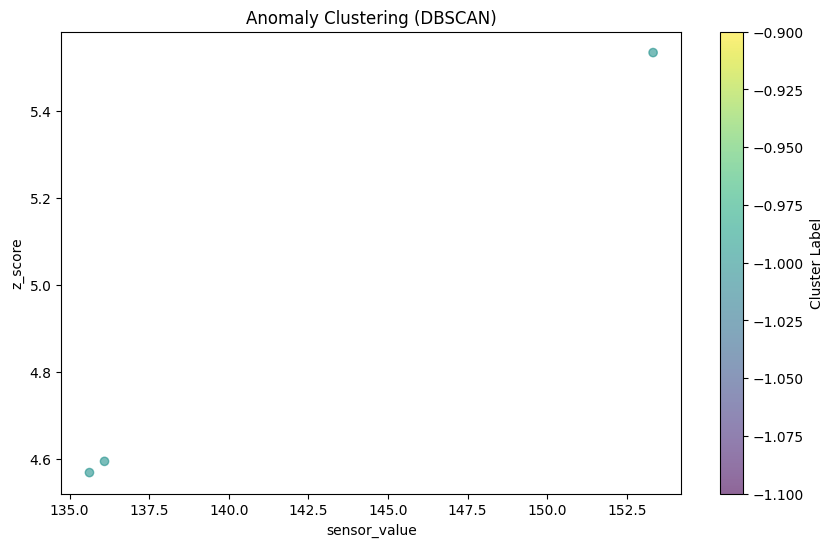

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster Label')
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.title("Anomaly Clustering (DBSCAN)")
plt.show()

In [36]:
output_path = r"C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Project-RP18\output\clustered_anomalies.csv"
df.to_csv(output_path, index=False)
print(f"Clustered anomalies saved at: {output_path}")

Clustered anomalies saved at: C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Project-RP18\output\clustered_anomalies.csv
